<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/rajiv-playpen/m2/mini-project-1/M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [342]:
# # @title Download the dataset
# !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
# !unzip Bike_Sharing_Dataset.zip



In [343]:
from utility import download_and_unzip, basic_data_details

download_and_unzip(
    filename="Bike_Sharing_Dataset.zip",
    url="https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip",
)


False

#### Importing Necessary Packages

In [344]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
import scipy


### Data Loading

In [345]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv("hour.csv")


print the first five rows of dataset

In [346]:
basic_data_details(df)



---------------------------------------------
Shape of the data: (17379, 17)
---------------------------------------------

---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [347]:
# YOUR CODE HERE
df.head(n=5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [348]:
# YOUR CODE HERE
df.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [349]:
df.shape


(17379, 17)

In [350]:
# check if the values are valid
hr_value = df["hr"].unique()
hr_value


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [351]:
df["hr"].agg(["nunique", "count"])
# [df['hr'==x].count for x in hr_value]


nunique       24
count      17379
Name: hr, dtype: int64

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [352]:
# df.describe()


In [353]:
# do we have same number of records for all the hours
hr_unique_with_count = df["hr"].value_counts()
hr_unique_with_count
hr_unique_with_count.info()
hr_unique_count = hr_unique_with_count.to_list()
hr_unique_values = hr_unique_with_count.index.to_list()
print(hr_unique_values, hr_unique_count)


<class 'pandas.core.series.Series'>
Index: 24 entries, 17 to 3
Series name: count
Non-Null Count  Dtype
--------------  -----
24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes
[17, 16, 13, 15, 14, 12, 22, 21, 20, 19, 18, 23, 11, 10, 9, 8, 7, 0, 6, 1, 5, 2, 4, 3] [730, 730, 729, 729, 729, 728, 728, 728, 728, 728, 728, 728, 727, 727, 727, 727, 727, 726, 725, 724, 717, 715, 697, 697]


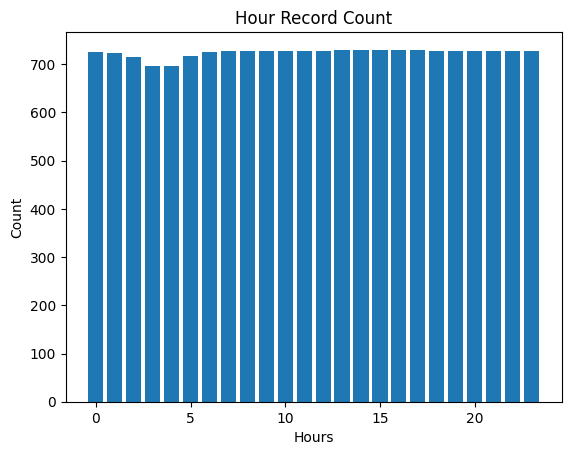

In [354]:
# YOUR CODE HERE
plt.bar(hr_unique_values, hr_unique_count)
plt.title("Hour Record Count")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()


In [355]:
# busy hours is the total bikes out on the road per hour
hourly_count = df.groupby("hr")["cnt"].sum()
hourly_count.head(n=5)


hr
0    39130
1    24164
2    16352
3     8174
4     4428
Name: cnt, dtype: int64

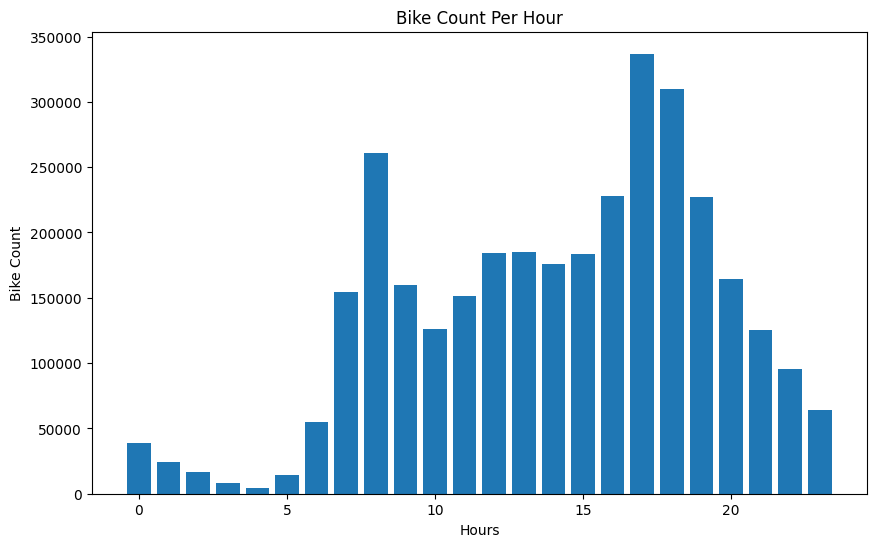

In [356]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_count.index.to_list(), hourly_count.to_list())
plt.title("Bike Count Per Hour")
plt.xlabel("Hours")
plt.ylabel("Bike Count")
plt.show()


#### Visualize the distribution of count, casual and registered variables

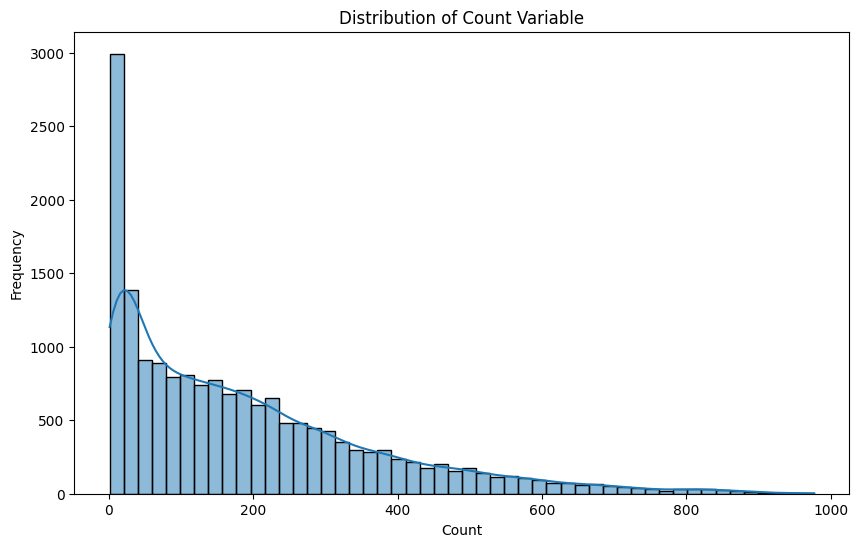

In [357]:
plt.figure(figsize=(10, 6))
sns.histplot(df["cnt"], bins=50, kde=True)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


In [358]:
# YOUR CODE HERE for distribuiton of count variable


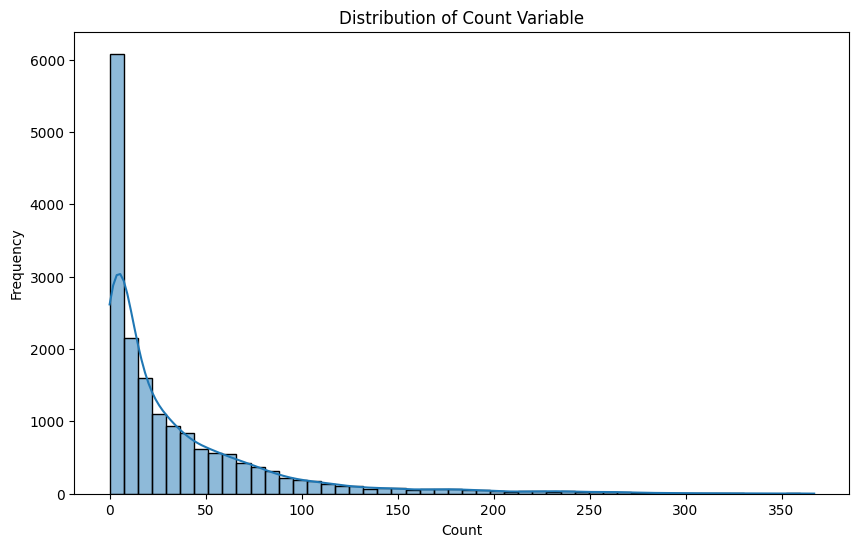

In [359]:
# YOUR CODE HERE for distribuiton of casual variable
plt.figure(figsize=(10, 6))
sns.histplot(df["casual"], bins=50, kde=True)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


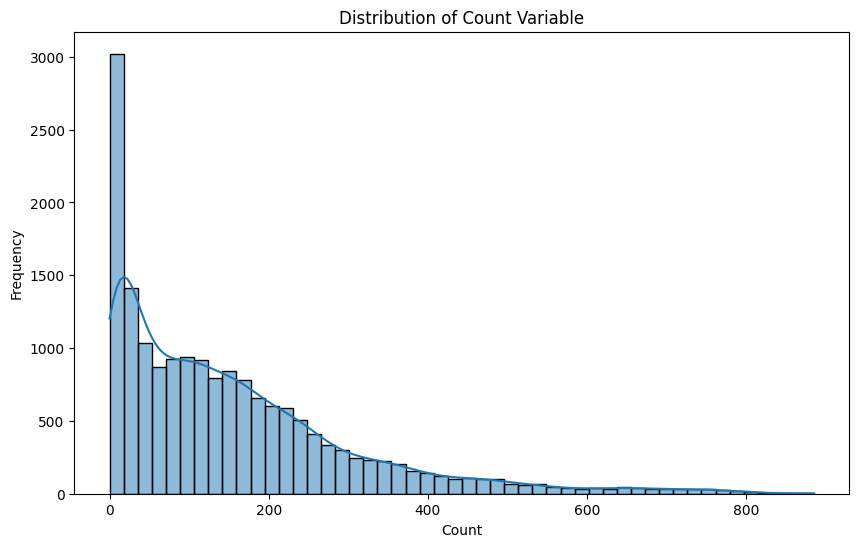

In [360]:
# YOUR CODE HERE for distribuiton of registered variable
plt.figure(figsize=(10, 6))
sns.histplot(df["registered"], bins=50, kde=True)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


In [361]:
# sns.histplot?


array([[<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

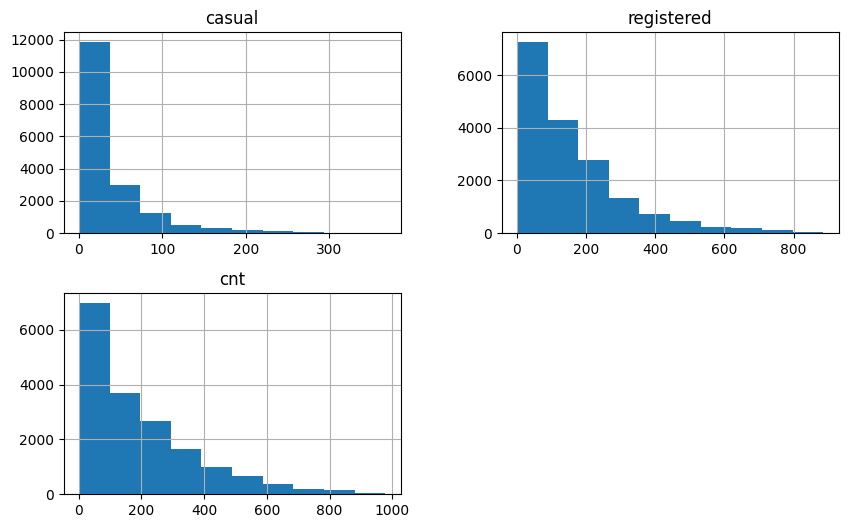

In [362]:
%matplotlib inline
df.hist(column=["casual", "registered", "cnt"], bins=10, figsize=(10, 6))


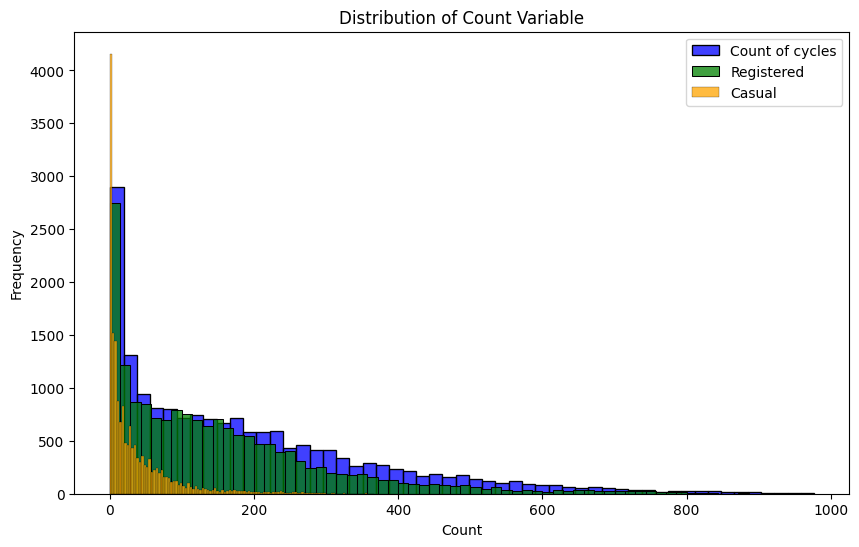

In [363]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df["cnt"],
    color="blue",
    # bins="auto",
    # kde=False,
    label="Count of cycles",
)
sns.histplot(
    df["registered"],
    color="green",
    # bins="auto",
    # kde=False,
    label="Registered",
)
sns.histplot(
    df["casual"],
    color="orange",
    # bins=10,
    # kde=False,
    label="Casual",
)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#### Describe the relation of weekday, holiday and working day

In [364]:
# Weekday, holiday and working day are categorical variables
# We can perform chi square test to check if they are independent or not
# YOUR CODE HERE


# df_ = df[["weekday", "holiday", "workingday"]]
# df_ = df_.apply(pd.to_numeric, errors="coerce")
# plt.figure(figsize=(10, 6))
# sns.heatmap(df_.corr(), annot=True, linewidth=0.5, center=0)
# plt.show()
print(df["weekday"].unique())
print(df["holiday"].unique())
print(df["workingday"].unique())


[6 0 1 2 3 4 5]
[0 1]
[0 1]


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [365]:
# let's look at the relevant column and data
print(df.columns)
print(df["yr"].unique())
print(df["mnth"].unique())


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [366]:
# stacked bar chart for year 2011
# YOUR CODE HERE
df_2011 = df[df["yr"] == 0]
df_2011_ = df_2011.groupby(["mnth"])[["casual", "registered"]].sum().reset_index()
df_2011_


,mnth,casual,registered
0,1,3073,35116
1,2,6242,41973
2,3,12826,51219
3,4,22346,72524
4,5,31050,104771
5,6,30612,112900
6,7,36452,104889
7,8,28842,107849
8,9,26545,100873
9,10,25222,98289


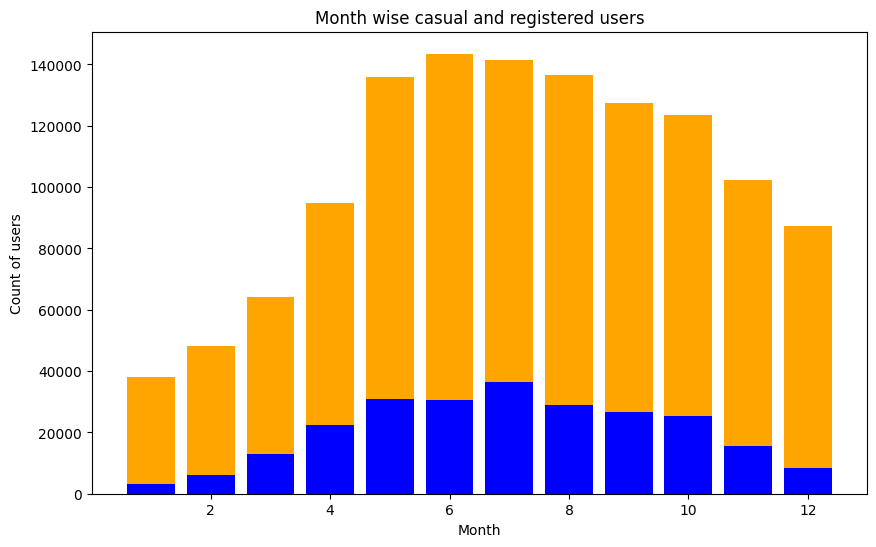

In [367]:
plt.figure(figsize=(10, 6))
plt.bar(
    df_2011_["mnth"].values, df_2011_["casual"].values, color="blue", label="casual"
)
plt.bar(
    df_2011_["mnth"].values,
    df_2011_["registered"].values,
    bottom=df_2011_["casual"].values,
    color="orange",
    label="registered",
)

plt.xlabel("Month")
plt.ylabel("Count of users")
plt.title("Month wise casual and registered users")
plt.show()


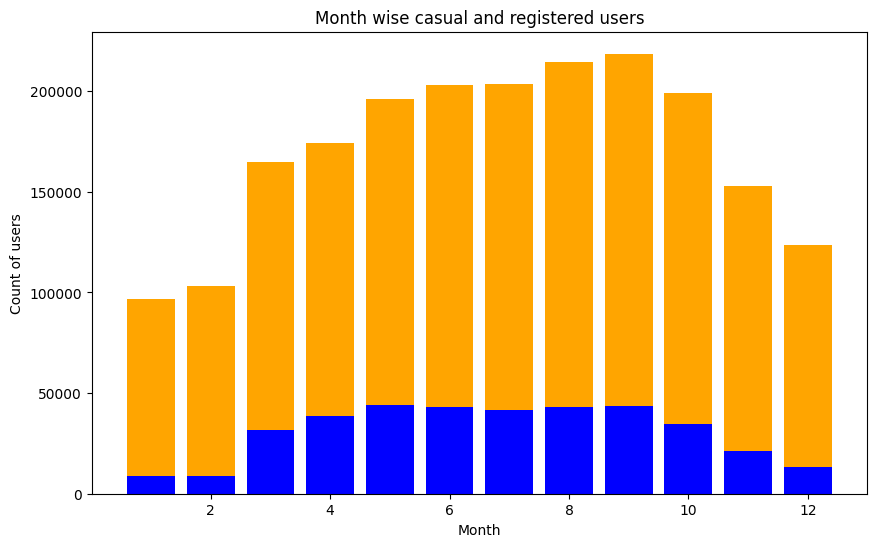

In [368]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df_ = df[df["yr"] == 1]
df_ = df_.groupby(["mnth"])[["casual", "registered"]].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_["mnth"].values, df_["casual"].values, color="blue", label="casual")
plt.bar(
    df_["mnth"].values,
    df_["registered"].values,
    bottom=df_["casual"].values,
    color="orange",
    label="registered",
)

plt.xlabel("Month")
plt.ylabel("Count of users")
plt.title("Month wise casual and registered users")
plt.show()


#### Analyze the correlation between features with heatmap

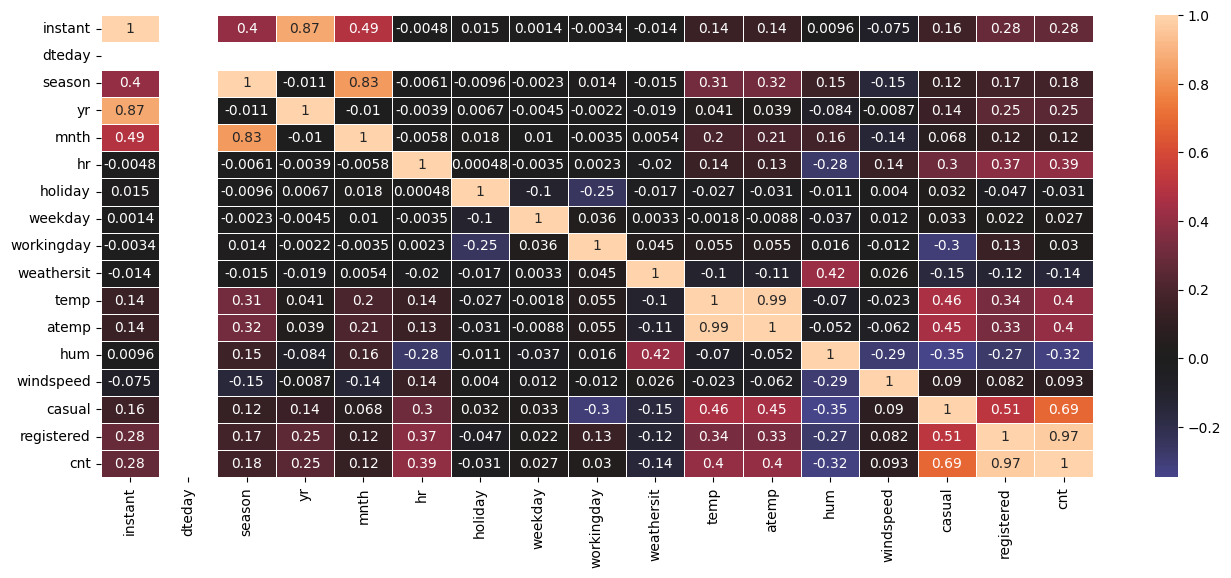

In [369]:
# YOUR CODE HERE
# Heatmap
df_ = df.copy(deep=True)
df_ = df_.apply(pd.to_numeric, errors="coerce")
plt.figure(figsize=(16, 6))
sns.heatmap(df_.corr(), annot=True, linewidth=0.5, center=0)
plt.show()


#### Understanding from the above correlation matrix

1. column `temp` and `atemp` are highly correlated (value `0.99`). Hence one can be dropped.
1. column `dteday` doesn't impact the `cnt`.
1. column `registered` users has more impact on `cnt` compared to `casual` users
1. column `instant` is indexing field hence doesn't influence the model. This comes from both domain knowledge as well as from matrix.
1. `windspeed` doesn't impact the `cnt` with coorelation value `0.093`
1. `hum` is negatively correlated with `cnt` with value `-0.32` which mean usages of cycle drops with high humidity.


#### Visualize the box plot of casual and registered variables to check the outliers

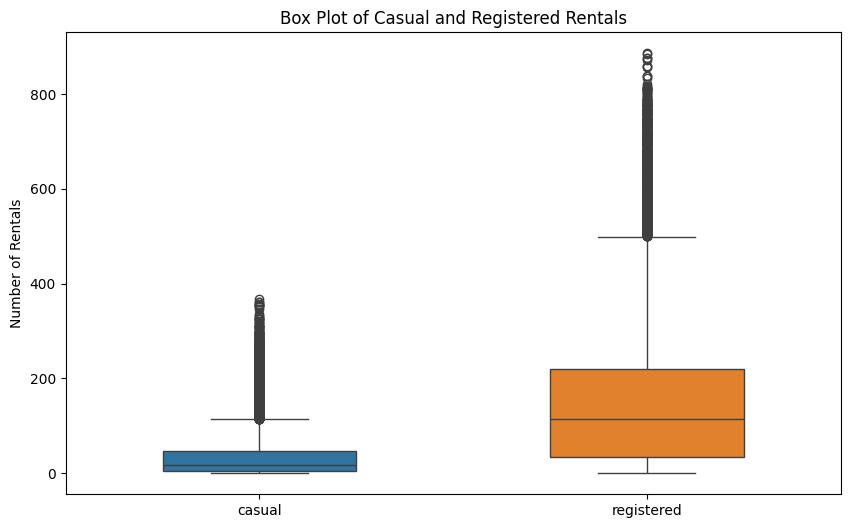

In [370]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df["casual"], df["registered"]], width=0.5)
plt.title("Box Plot of Casual and Registered Rentals")
plt.ylabel("Number of Rentals")

plt.show()

# investigate further for the outliers
# may be a holiday.


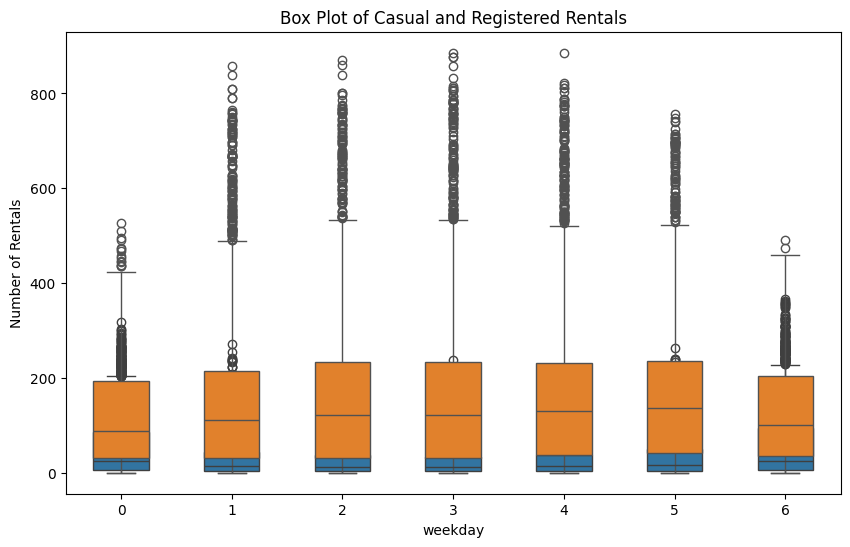

In [371]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="weekday", y="casual", data=df, width=0.5)
sns.boxplot(x="weekday", y="registered", data=df, width=0.5)
plt.title("Box Plot of Casual and Registered Rentals")
plt.ylabel("Number of Rentals")

plt.show()


In [372]:
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [373]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [374]:
# YOUR CODE HERE
# Drop unwanted columns
df.drop(columns=["instant", "dteday", "temp"], inplace=True)
df.head(5)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0,1,1


#### Identify categorical and continuous variables


In [375]:
# YOUR CODE HERE
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.9 MB


In [376]:
#Converting Casual, Registered and Count as Float to group as continuous variable
df['casual'] = df['casual'].astype(float) 
df['registered'] = df['registered'].astype(float)
df['cnt'] = df['cnt'].astype(float)

continuous_variables = ['atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_variables =['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  float64
 12  registered  17379 non-null  float64
 13  cnt         17379 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 1.9 MB


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [377]:
# YOUR CODE HERE
scaler = StandardScaler()
df[continuous_variables] = scaler.fit_transform(df[continuous_variables])
df.head(10)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,1,0,1,1,0,6,0,1,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,1,0,1,2,0,6,0,1,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,1,0,1,3,0,6,0,1,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,1,0,1,4,0,6,0,1,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037
5,1,0,1,5,0,6,0,2,-1.269602,0.636370,-0.821484,-0.723603,-1.009474,-1.039037
6,1,0,1,6,0,6,0,1,-1.181732,0.895539,-1.553889,-0.683038,-1.016081,-1.033524
7,1,0,1,7,0,6,0,1,-1.269602,1.206542,-1.553889,-0.703320,-1.002867,-1.028011
8,1,0,1,8,0,6,0,1,-1.093281,0.636370,-1.553889,-0.703320,-0.969832,-1.000445
9,1,0,1,9,0,6,0,1,-0.740638,0.688203,-1.553889,-0.561343,-0.976439,-0.967366


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [378]:
df_backup = df.copy(deep=True)


In [379]:
# YOUR CODE HERE
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_variables])

df_with_encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_variables))
df_with_encoded_features.head(5)



,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [380]:
df_standardized_encoded = pd.concat([df_with_encoded_features, df[continuous_variables]], axis=1)
df_standardized_encoded.head(5)


,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weathersit_1,weathersit_2,weathersit_3,weathersit_4,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037


#### Specify features and targets after applying scaling and one-hot encoding

In [381]:
# YOUR CODE HERE
targets = ['casual', 'registered', 'cnt']
features = df_standardized_encoded.drop(columns=targets).columns.to_list()
print(f"Features: {features}")
print(f"Targets: {targets}")


Features: ['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'atemp', 'hum', 'windspeed']
Targets: ['casual', 'registered', 'cnt']


### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
# YOUR CODE HERE


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [ ]:
# YOUR CODE HERE


### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


In [ ]:
# YOUR CODE HERE


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
